In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
df = pd.read_csv('/nesi/project/niwa00018/queenle/ML_emulator_temporal_sampling_experiments/training/temporal_samplings_2.csv')

# LOAD EXAMPLE FILE
example = xr.open_dataset('/nesi/project/niwa00018/ML_downscaling_CCAM/multi-variate-gan/inputs/predictor_fields/predictor_fields_hist_ssp370_merged_updated.nc')
years = np.unique(example.time.dt.year)
indices = [i for i in range(len(years))]


In [3]:
for period in ['1961-1980','2015-2034','2080-2099']:
    
    start = int(period.split('-')[0])
    end = int(period.split('-')[1])
    
    df[period] = [i for i in range(start,end+1)] + [np.nan for i in range(120)]

In [26]:
'''
LOAD SAVED SAMPLINGS, PLOT
'''

def plot_temporal_samplings(df):
    
    fig,axs = plt.subplots(figsize=(12,10),layout='constrained')
    
    sample_n_df = df[[col for col in df.columns if col not in ['1961-1980','2015-2034','2080-2099']]]
    period_df = df[[col for col in df.columns if col in ['1961-1980','2015-2034','2080-2099']]]
    
    for sample_n in sample_n_df:
    
        selected_years = sample_n_df[sample_n].values
        selected_years = selected_years[~np.isnan(selected_years)]
        selected_years = [int(v) for v in selected_years]
        
        unselected_years = [val for val in years if val not in selected_years]
        
        axs.scatter(selected_years,[int(sample_n) for i in range(len(selected_years))],c='red',s=14,marker='*')
        axs.scatter(unselected_years,[int(sample_n) for i in range(len(unselected_years))],c='black',s=400,marker='|')
        
    y_vals = [-50,-40,-30]
    for i,period in enumerate(period_df):
        selected_years = period_df[period].values
        selected_years = selected_years[~np.isnan(selected_years)]
        selected_years = [int(v) for v in selected_years]
        
        unselected_years = [val for val in years if val not in selected_years]
        
        axs.scatter(selected_years,[y_vals[i] for j in range(len(selected_years))],c='red',s=14,marker='*',label='Selected Year' if i == 0 else '')
        axs.scatter(unselected_years,[y_vals[i] for j in range(len(unselected_years))],c='black',s=400,marker='|',label='Unselected Year' if i == 0 else '')
        
    axs.axhline(-5,color='black')
        
    axs.set_yticks(y_vals + [int(v) for v in sample_n_df.columns],labels = period_df.columns.tolist() + sample_n_df.columns.tolist(),fontsize=16)
    
    year_ticks = [1960,1995,2030,2065,2100]
    axs.set_xticks(year_ticks,[str(val) for val in year_ticks],fontsize=16)
    axs.set_xlabel('Year',fontsize=20)
    
    axs.set_ylim(-60,160)
    
    #axs.text(0.1, 0.95, 'Random Stratisfied Sampling', va='center', ha='left',rotation='horizontal', transform=axs.transAxes,fontsize=20)
    #axs.text(0.1, 0.2, '20-year Periods', va='center', ha='left',rotation='horizontal', transform=axs.transAxes,fontsize=20)

    axs.text(1960, 150, '(a) Stratified Random Sampling', va='center', ha='left',rotation='horizontal', fontsize=20)
    axs.text(1960, -15, '(b) 20-year Periods', va='center', ha='left',rotation='horizontal', fontsize=20)
    axs.text(-0.1, 0.6, 'Sample size (years)', va='center', ha='center',rotation='vertical', transform=axs.transAxes,fontsize=20)
    
    #handles, labels = axs[0][1].get_legend_handles_labels()
    legend = fig.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.55, -0.1),fontsize=22, markerscale=2, edgecolor='white', handletextpad=0.1)
    

    plt.savefig('final_figures/Figure1.png',dpi=300, bbox_inches='tight', bbox_extra_artists=(legend,))

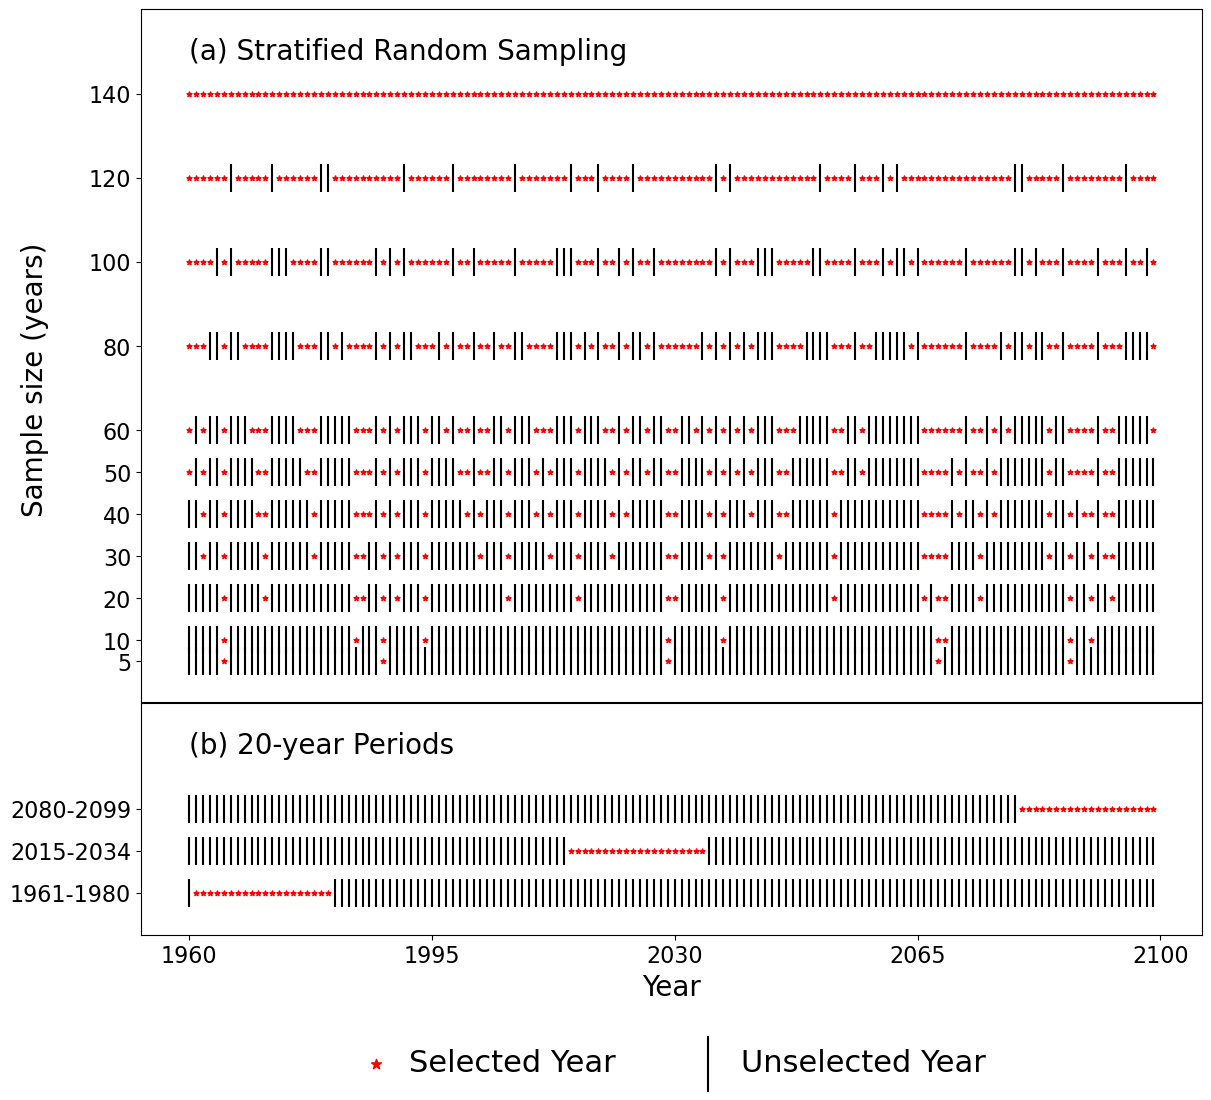

In [27]:
plot_temporal_samplings(df.drop(['70','90','110','130'],axis=1))